In [245]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt

## Creating the dataset

In [246]:
dataSet = pd.read_csv('./../dataSet/Dataset_spine.csv')

dataSet.drop([dataSet.keys()[-1]], axis=1, inplace=True)
dataSet['target'] = dataSet['class'].apply(lambda x: 0 if x == 'Abnormal' else 1)
#dataSet

## Creating the train and test arrays

In [247]:
arrayDataSet = dataSet.to_numpy()
X = arrayDataSet[:,0:12]
y = arrayDataSet[:,-1]
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## Creating the MLP classifier

In [248]:
mlpClassifier = MLPClassifier(max_iter=500,activation='logistic')
mlpClassifier.fit(X_train, y_train)
y_pred = mlpClassifier.predict(X_test)

## Analyzing the Classifier

In [249]:
def analyze(targets,preds):
    hit = [True if preds[i] == targets[i] else False for i in range(len(targets))]
    hitRate = (hit.count(True)/len(hit))*100
    return hitRate

analyze(y_test, y_pred)

81.72043010752688

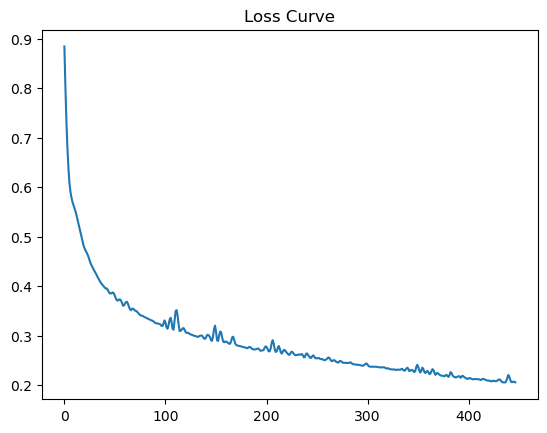

In [250]:
plt.title('Loss Curve')
plt.plot(range(len(mlpClassifier.loss_curve_)),mlpClassifier.loss_curve_)